In [2]:
#Imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read csv file
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header = 1)#header = 1 -> day	month	year	Temperature	RH	Ws	Rain	FFMC	DMC	DC	ISI	BUI	FWI	Classes(will not take them as feature)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()# dtypes should  not be object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
#DATA CLEANING
#missing values
# df.isna()
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df[df.isnull().any(axis = 1)] #axis = 1 means row and o means column

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.loc[:122,"Region"] = 0 ## making new column region and assigning values for sepreating the dataset and dicided the dataset
df.loc[122:,"Region"] = 1
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [8]:
df[["Region"]] = df[["Region"]].astype(int)#changed the datatype to use less memory

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [10]:
df = df.dropna().reset_index(drop = True)#removed all null values and reset the index
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [11]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
df = df.drop(122).reset_index(drop = True)# dropped 122 row bcz it contained redundancy of header attributes

In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [14]:
df.columns = df.columns.str.strip()#fixing column names and .str helps in using string commands
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [15]:
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)
# changed the datatypes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [17]:
# changed the datatypes in different way
objects = [features for features in df.columns if df[features].dtypes == 'O']# O here stands for object dtype of columns 
for i in objects:
    if i != "Classes":
        df[i] = df[i].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [19]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [20]:
# saved the cleaned dataset
df.to_csv("Algerian_forest_fires_dataset_cleaned.csv",index = False)

In [21]:
#reopend the cleaned dataset
df = pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [22]:
df_copy = df.drop(["day","month","year"],axis = 1) # day month and year are having no relation to our dependent attribute
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [23]:
df_copy['Classes'].value_counts()#counts the unique values

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [24]:
# This not only helps in encoding but also helps in standard representation of choices
df_copy["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [25]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


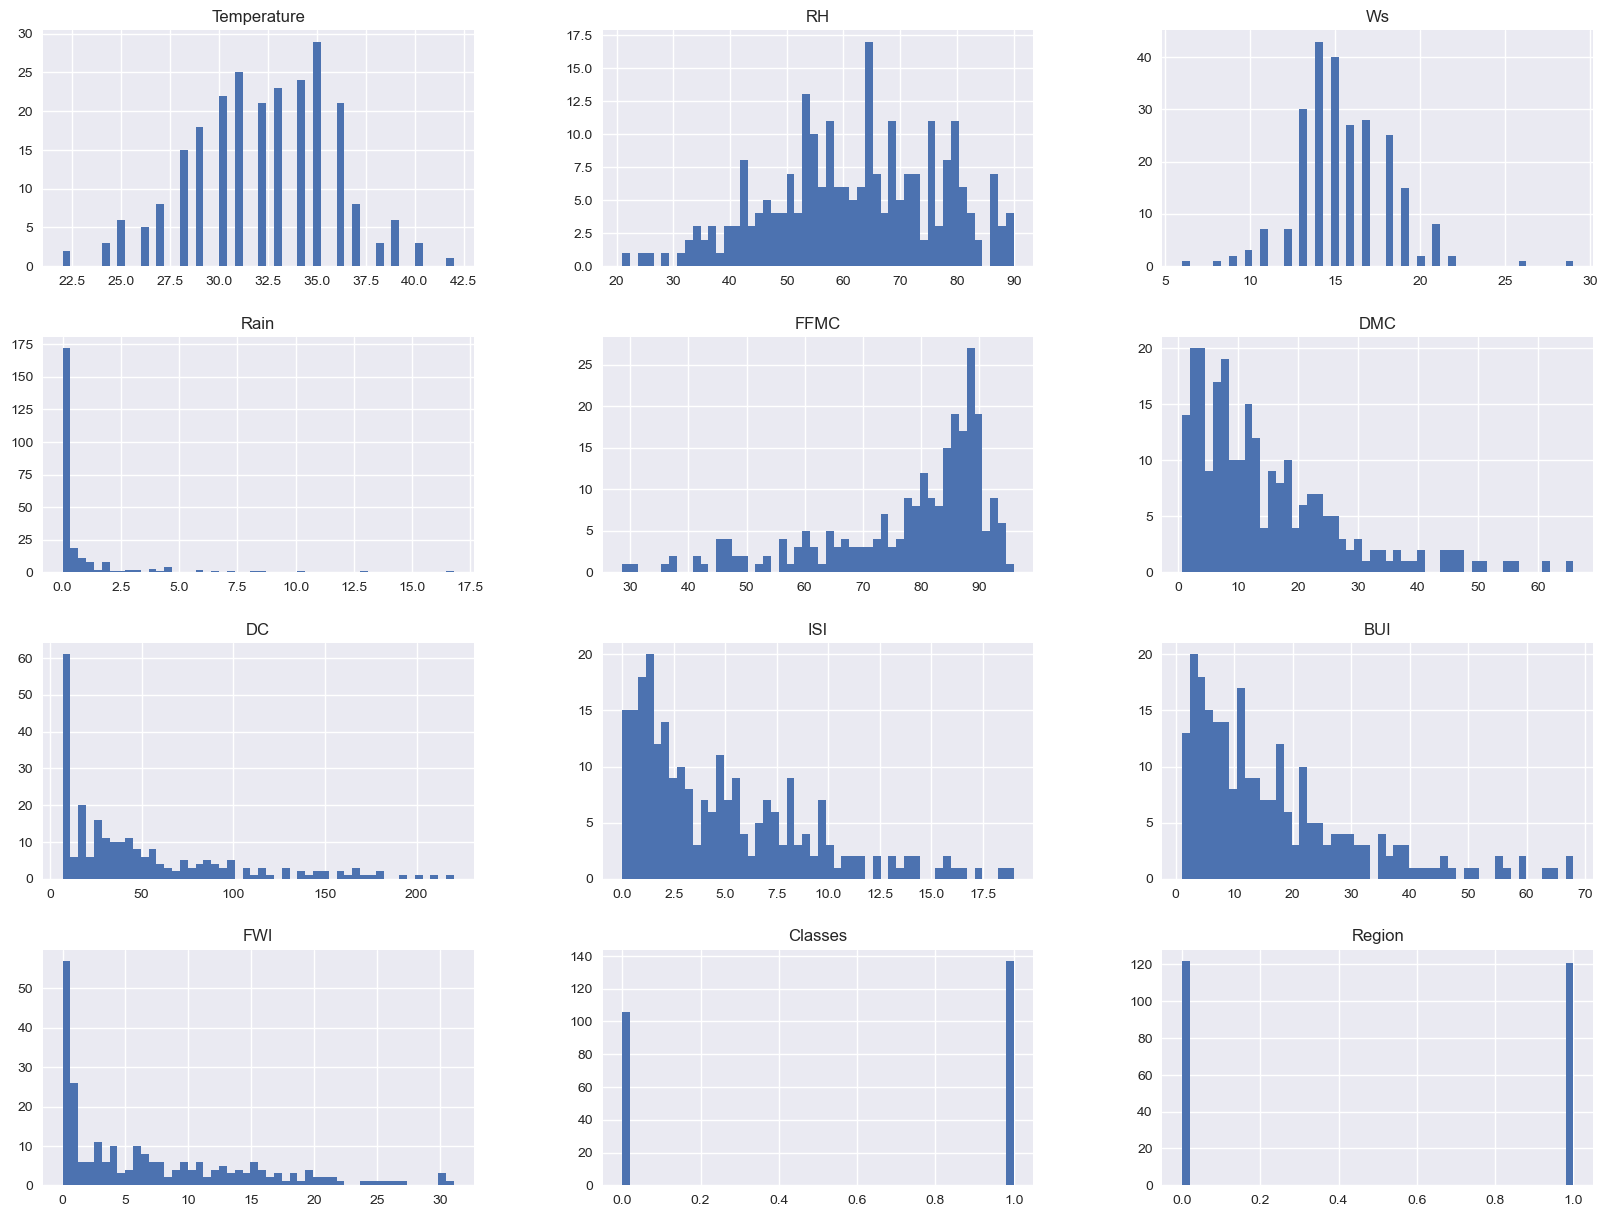

In [26]:
import seaborn as sns
plt.style.use("seaborn-v0_8") 
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [27]:
df_copy["Classes"].value_counts
percentage = df_copy["Classes"].value_counts(normalize = True)*100

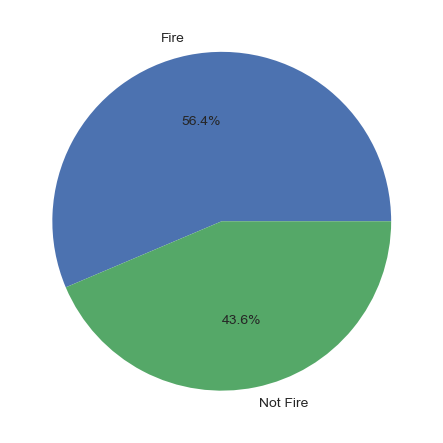

In [28]:
classlabels = ["Fire","Not Fire"]
# plt.figure(figsize = (3,3))
plt.pie(percentage,labels = classlabels,autopct = "%1.1f%%")
plt.show()

In [29]:
##correlation

In [30]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


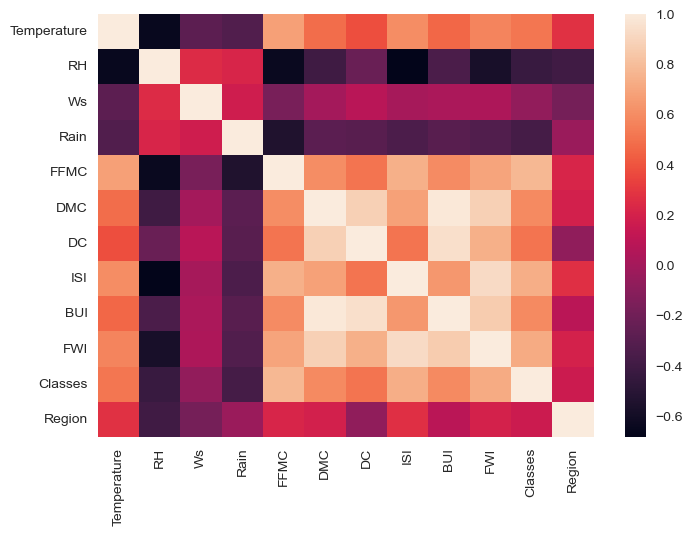

In [31]:
sns.heatmap(df_copy.corr())
plt.show()

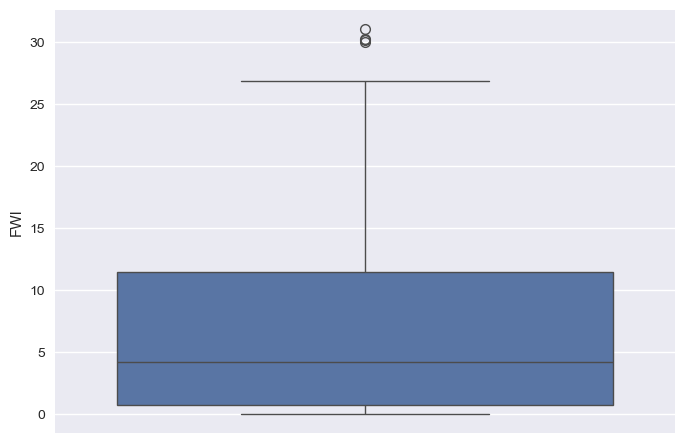

In [32]:
sns.boxplot(df_copy["FWI"])
plt.show()

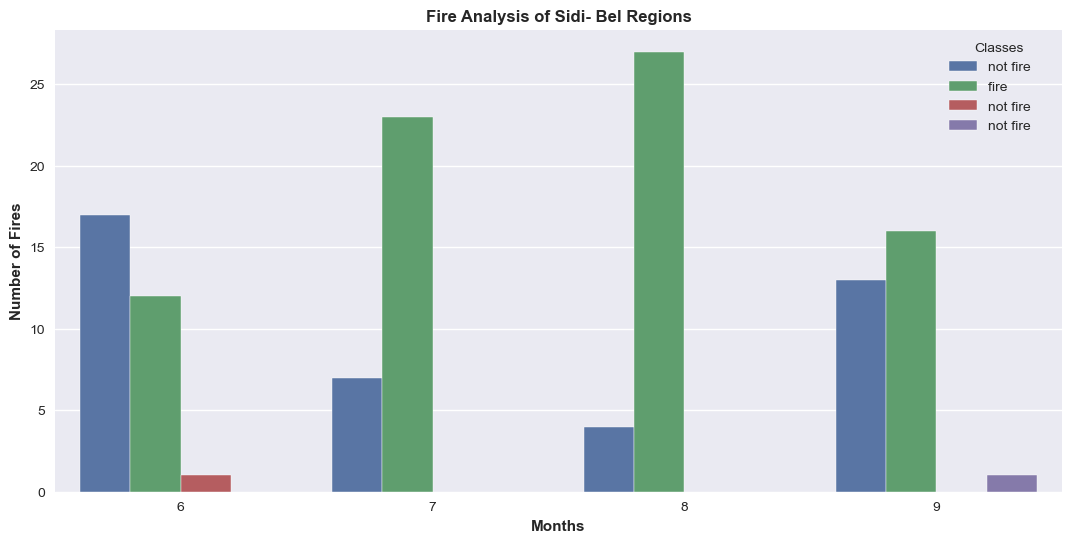

In [33]:
dftemp=df.loc[df['Region']==1]#filter our data as we have to plot the frequencies of monthly fire case(this is talking about fire cases)
plt.subplots(figsize=(13,6))# doing nothing just initializing the figure size
sns.set_style('whitegrid') #sets style for matplotlib visualization here it sets background as whitegrid
sns.countplot(x='month',hue='Classes',data=dftemp)# You can give only 1 argument x or y bcause its plots counts/frequency of a attribute, hue is divider of a single bar,data is the data goven from which x attribute will be selected
plt.ylabel('Number of Fires',weight='bold')#weight = bold means bold label
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')
plt.show()

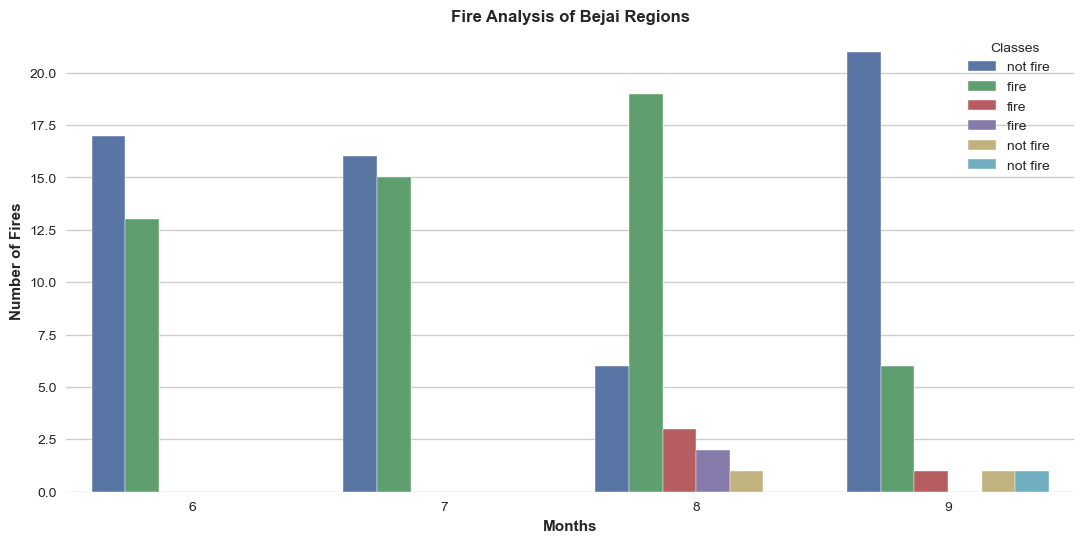

In [34]:
dftemp=df.loc[df['Region']==0]#filter our data as we have to plot the frequencies of monthly fire case(this is talking about non - fire cases)
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Bejai Regions",weight='bold')
plt.show()

In [35]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

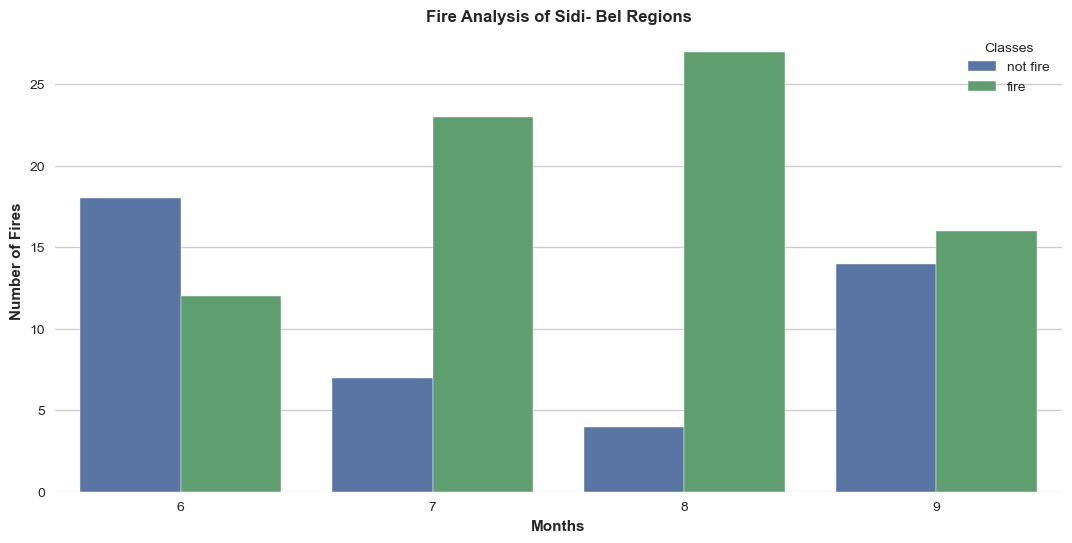

In [36]:
dftemp=df.loc[df['Region']==1]#filter our data as we have to plot the frequencies of monthly fire case(this is talking about fire cases)
plt.subplots(figsize=(13,6))# doing nothing just initializing the figure size
sns.set_style('whitegrid') #sets style for matplotlib visualization here it sets background as whitegrid
sns.countplot(x='month',hue='Classes',data=dftemp)# You can give only 1 argument x or y bcause its plots counts/frequency of a attribute, hue is divider of a single bar,data is the data goven from which x attribute will be selected
plt.ylabel('Number of Fires',weight='bold')#weight = bold means bold label
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')
plt.show()

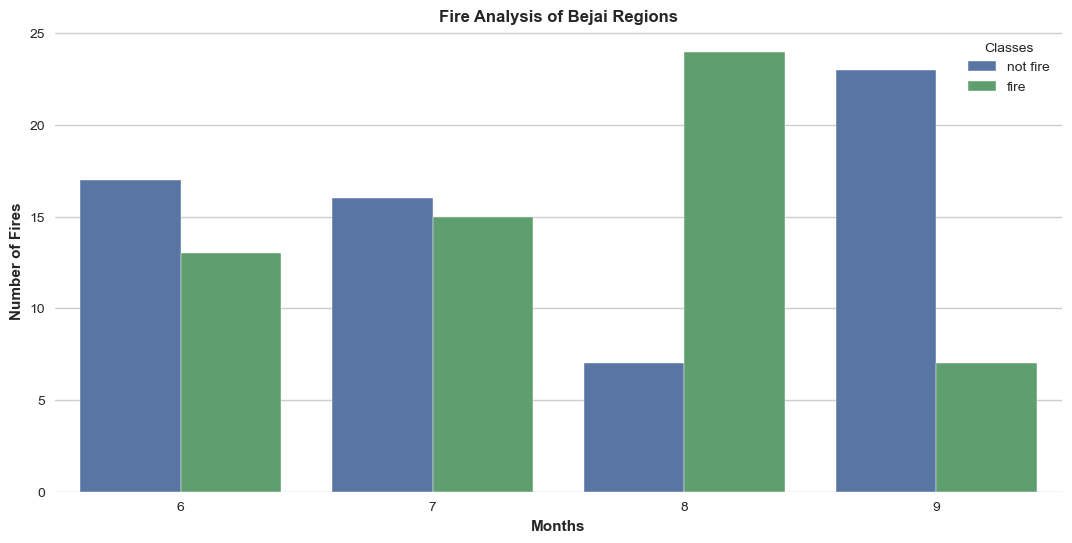

In [37]:
dftemp=df.loc[df['Region']==0]#filter our data as we have to plot the frequencies of monthly fire case(this is talking about non - fire cases)
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Bejai Regions",weight='bold')
plt.show()

In [38]:
df = df_copy

In [39]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [40]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [41]:
X = df.drop("FWI",axis = 1)
Y = df["FWI"]

In [42]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [43]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [44]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


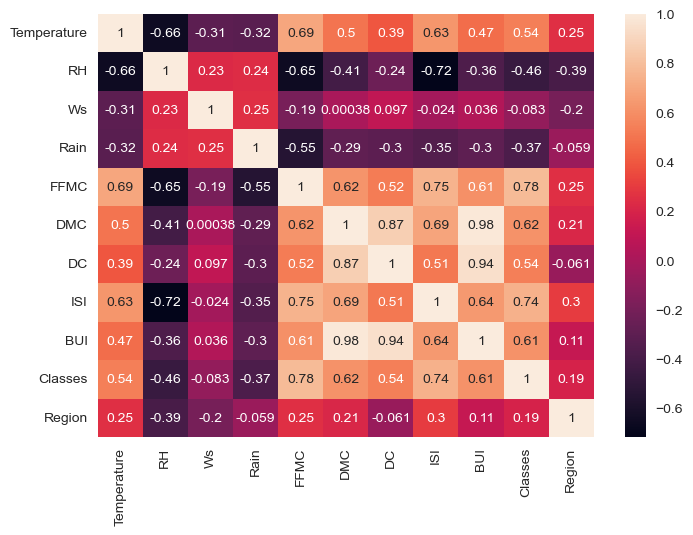

In [45]:
corr = X_train.corr()
sns.heatmap(corr,annot = True)
plt.show()

In [46]:
# def correlation(dataset,threshold):
#     high_correlated = set()
#     for feature in dataset.columns:
#         if feature.corr()>threshold:
#             high_correlated.add(feature)
#     return high_correlated
# print(correlation(X_train,0.85))

In [47]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr
col_corr = correlation(X_train,0.85)

In [48]:
X_train.drop(col_corr,axis = 1,inplace = True)
X_test.drop(col_corr,axis = 1,inplace = True)

In [49]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train,X_test

(array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         -1.10431526, -0.98907071],
        [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         -1.10431526,  1.01105006],
        [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
          0.90553851,  1.01105006],
        ...,
        [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         -1.10431526, -0.98907071],
        [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
          0.90553851,  1.01105006],
        [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         -1.10431526, -0.98907071]]),
 array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
         -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
          2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
        [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
         -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
          3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
        [-1

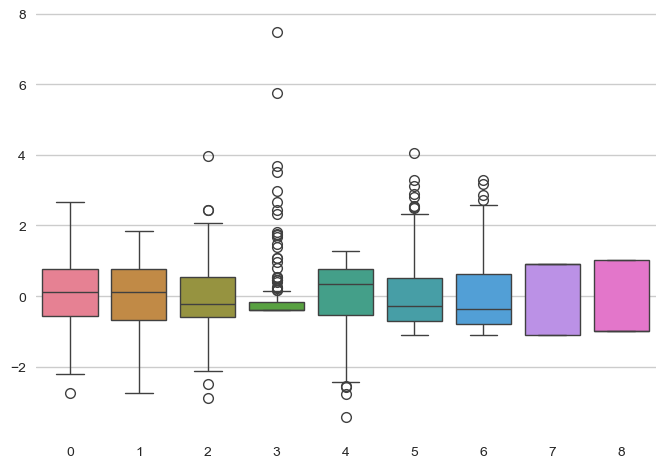

In [52]:
sns.boxplot(X_train)
plt.show()

In [53]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [54]:
pred = regression.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score
mae = mean_absolute_error(Y_test,pred)
score = r2_score(Y_test,pred)

In [55]:
print(mae)
print(score)

0.5468236465249993
0.9847657384266951


In [56]:
from sklearn.linear_model import Lasso
regression = Lasso()
regression.fit(X_train,Y_train)
pred_lasso = regression.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score
mae_lasso = mean_absolute_error(Y_test,pred_lasso)
score_lasso = r2_score(Y_test,pred_lasso)
print(mae_lasso)
print(score_lasso)

1.1331759949144085
0.9492020263112388


In [57]:
from sklearn.linear_model import Ridge
regression = Ridge()
regression.fit(X_train,Y_train)
pred_Ridge = regression.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score
mae_Ridge = mean_absolute_error(Y_test,pred_Ridge)
score_Ridge = r2_score(Y_test,pred_Ridge)
print(mae_Ridge)
print(score_Ridge)

0.5642305340105712
0.9842993364555513


In [58]:
from sklearn.linear_model import ElasticNet
regression = ElasticNet()
regression.fit(X_train,Y_train)
pred_ElasticNet = regression.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score
mae_ElasticNet = mean_absolute_error(Y_test,pred_ElasticNet)
score_ElasticNet = r2_score(Y_test,pred_ElasticNet)
print(mae_ElasticNet)
print(score_ElasticNet)

1.8822353634896
0.8753460589519703


0.6199701158263432
0.9820946715928275


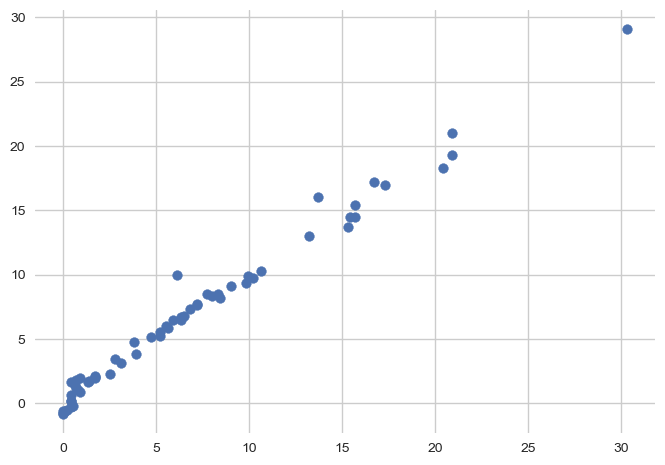

In [59]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train,Y_train)
pred_lassocv = lassocv.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score
mae_lassocv = mean_absolute_error(Y_test,pred_lassocv)
score_lassocv = r2_score(Y_test,pred_lassocv)
print(mae_lassocv)
print(score_lassocv)
plt.show(plt.scatter(Y_test,pred_lassocv))

In [60]:
print(lassocv.alpha_)
print(lassocv.alphas_)
print(lassocv.mse_path_)

0.05725391318234408
[7.05853002 6.58280872 6.13914944 5.72539132 5.33951911 4.97965339
 4.64404142 4.33104857 4.03915039 3.76692517 3.51304702 3.27627941
 3.05546914 2.84954075 2.65749124 2.47838523 2.31135036 2.15557308
 2.01029467 1.87480753 1.74845178 1.63061198 1.52071419 1.41822315
 1.32263965 1.23349817 1.15036452 1.0728338  1.00052839 0.93309613
 0.87020857 0.81155943 0.75686304 0.705853   0.65828087 0.61391494
 0.57253913 0.53395191 0.49796534 0.46440414 0.43310486 0.40391504
 0.37669252 0.3513047  0.32762794 0.30554691 0.28495408 0.26574912
 0.24783852 0.23113504 0.21555731 0.20102947 0.18748075 0.17484518
 0.1630612  0.15207142 0.14182231 0.13226397 0.12334982 0.11503645
 0.10728338 0.10005284 0.09330961 0.08702086 0.08115594 0.0756863
 0.0705853  0.06582809 0.06139149 0.05725391 0.05339519 0.04979653
 0.04644041 0.04331049 0.0403915  0.03766925 0.03513047 0.03276279
 0.03055469 0.02849541 0.02657491 0.02478385 0.0231135  0.02155573
 0.02010295 0.01874808 0.01748452 0.0163061

0.5642305340105712
0.9842993364555513


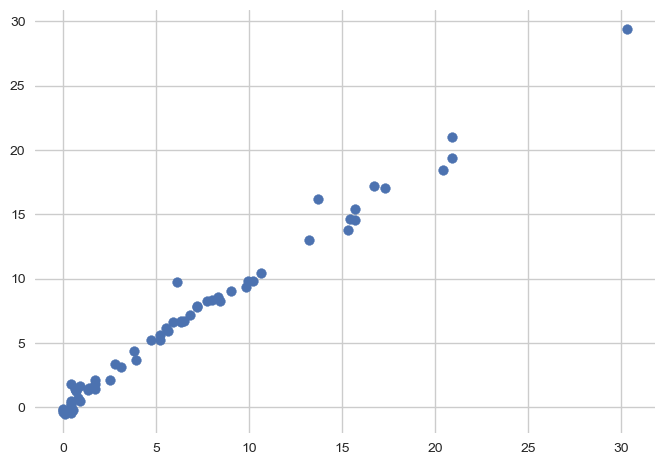

In [61]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train,Y_train)
pred_Ridge = ridgecv.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score
mae_Ridge = mean_absolute_error(Y_test,pred_Ridge)
score_Ridge = r2_score(Y_test,pred_Ridge)
print(mae_Ridge)
print(score_Ridge)
plt.show(plt.scatter(Y_test,pred_Ridge))

In [62]:
print(ridgecv.alpha_)
print(ridgecv.alphas)

1.0
(0.1, 1.0, 10.0)


0.6575946731430905
0.9814217587854941


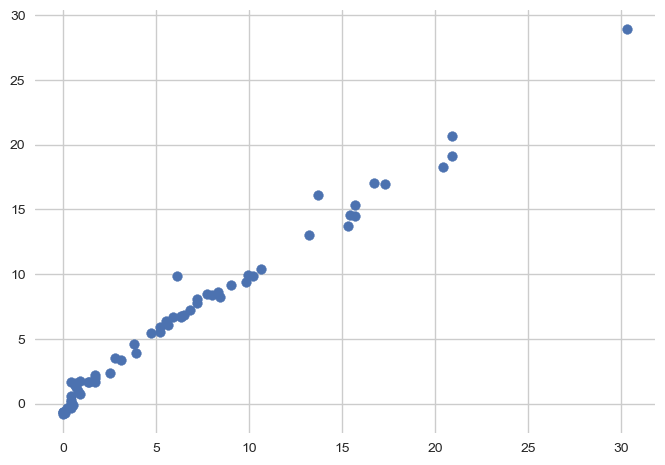

In [63]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv = 5)
elasticnetcv.fit(X_train,Y_train)
pred_ElasticNetcv = elasticnetcv.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score
mae_ElasticNetcv = mean_absolute_error(Y_test,pred_ElasticNetcv)
score_ElasticNetcv = r2_score(Y_test,pred_ElasticNetcv)
print(mae_ElasticNetcv)
print(score_ElasticNetcv)
plt.show(plt.scatter(Y_test,pred_ElasticNetcv))

In [64]:
print(elasticnetcv.alpha_)
print(elasticnetcv.alphas_)

0.04311146156383891
[14.11706004 13.16561744 12.27829889 11.45078264 10.67903821  9.95930678
  9.28808283  8.66209714  8.07830078  7.53385034  7.02609405  6.55255882
  6.11093829  5.6990815   5.31498248  4.95677045  4.62270071  4.31114616
  4.02058933  3.74961507  3.49690356  3.26122397  3.04142839  2.83644629
  2.64527931  2.46699633  2.30072904  2.1456676   2.00105679  1.86619226
  1.74041714  1.62311885  1.51372607  1.411706    1.31656174  1.22782989
  1.14507826  1.06790382  0.99593068  0.92880828  0.86620971  0.80783008
  0.75338503  0.7026094   0.65525588  0.61109383  0.56990815  0.53149825
  0.49567705  0.46227007  0.43111462  0.40205893  0.37496151  0.34969036
  0.3261224   0.30414284  0.28364463  0.26452793  0.24669963  0.2300729
  0.21456676  0.20010568  0.18661923  0.17404171  0.16231189  0.15137261
  0.1411706   0.13165617  0.12278299  0.11450783  0.10679038  0.09959307
  0.09288083  0.08662097  0.08078301  0.0753385   0.07026094  0.06552559
  0.06110938  0.05699082  0.0531

In [65]:
import pickle
pickle.dump(regression,open("lasso.pkl","wb"))
pickle.dump(ridgecv,open("Ridge.pkl","wb"))
pickle.dump(scaler,open("scaler.pkl","wb"))

In [66]:
pickle.load(open("Ridge.pkl","rb"))

RidgeCV(cv=5)

In [67]:
pickle.load(open("lasso.pkl","rb"))

ElasticNet()